# Algotytm przecinania się odcinków na płaszczyźnie

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Definicja stałych

In [5]:
# generowanie odcinków
MIN_X = 0
MIN_Y = 0

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()

def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

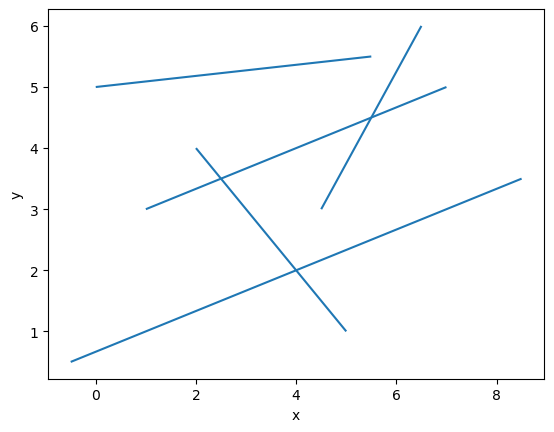

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

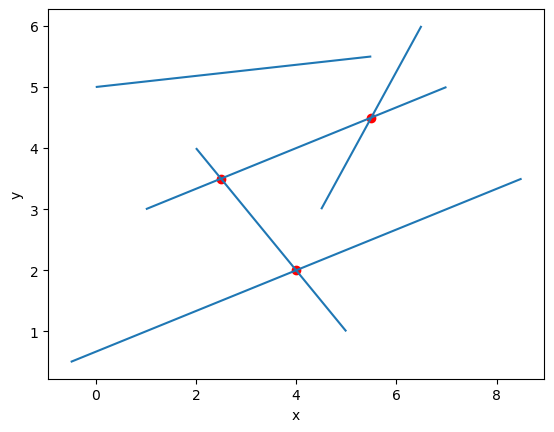

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [8]:
import random

In [9]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów.
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """

    uniformSections = []
    sectionsEndsXCoordinate = set()

    while len(uniformSections) < n:
        x1 = random.uniform(MIN_X, max_x)
        x2 = random.uniform(MIN_X, max_x)

        if x1 == x2 or x1 in sectionsEndsXCoordinate or x2 in sectionsEndsXCoordinate:
            continue

        y1 = random.uniform(MIN_Y, max_y)
        y2 = random.uniform(MIN_Y, max_y)

        section = ((x1, y1), (x2, y2))
        uniformSections.append(section)

    return uniformSections

In [17]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.080s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [12]:
sections = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

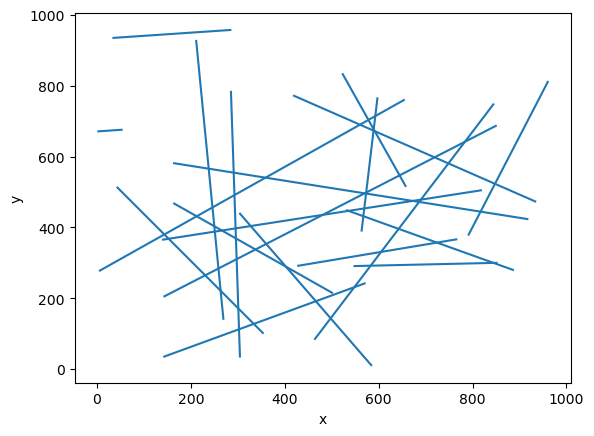

In [14]:
vis = Visualizer()
vis.add_line_segment(sections)
vis.show()

Uzupełnij funkcję ```get_segments``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [ ]:
def get_segments():
    """
    Odczytuje punkty wprowadzone przez użytkownika myszką i zwraca listę odcinków jako krotki punktów, które są
    krotkami liczb zmiennoprzecinkowych.
    Wewnątrz Jupyter Notebook używać wraz z ***%matplotlib widget***

    :return list of tuple: Lista, w której każdy element jest krotką krotek reprezentujących odcinki ((x1, y1), (x2, y2)).
    """
    # Event handler for mouse click
    def on_click(event):
        nonlocal pickSegmentBeg, segmentBegX, segmentBegY
        # Check if it's a left-click within the axes
        if event.button == 1 and event.inaxes == ax:
            # Append the point and update the plot
            currX, currY = event.xdata, event.ydata
            ax.scatter(currX, currY, color = "blue", marker = 'o')  # Mark the point

            # check if it is first or second point in line segment
            if pickSegmentBeg:
                segmentBegX, segmentBegY = currX, currY
            else:
                xs = [segmentBegX, currX]
                ys = [segmentBegY, currY]
                ax.plot(xs, ys, color = "blue")
                segment = ((segmentBegX, segmentBegY), (currX, currY))
                segments.append(segment)

            # update information about point type
            pickSegmentBeg = not pickSegmentBeg

            # update plot
            plt.draw()

        # If right-click, close the polygon by connecting to the first point
        elif event.button == 3 and pickSegmentBeg:
            plt.draw()
            fig.canvas.mpl_disconnect(cid)  # Disconnect the event
            # plt.close("all")

    plt.close('all')    # close all opened plots

    segments = []
    pickSegmentBeg = True
    segmentBegX, segmentBegY = None, None

    fig, ax = plt.subplots(num = "get line segments")
    ax.set_title("Left-click to select points; right-click to finish")

    # Connect the event handler
    cid = fig.canvas.mpl_connect('button_press_event', on_click)

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()

    return segments

Uzupełnij funkcję ```is_intersection```

In [ ]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(2, is_intersection)

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [ ]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [ ]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak?

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.